<a href="https://colab.research.google.com/github/claranatalie01/Supervised-Learning-Youtube-Views-Prediction/blob/main/source_code_Supervised_peerData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

path = 'drive/MyDrive/youtube_statistics.xlsx'

Mounted at /content/drive


In [ ]:
df = pd.read_excel(path)
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


# DESCRIPTIVE STATISTIC

In [ ]:
# Informasi umum dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

#### Observation:
1. tipe data kolom 'trending_date' harusnya datetime karena merupakan data tanggal
2. tipe data kolom 'publish_time' harusnya datetime karena menunjukkan data waktu
3. terdapat missing value pada kolom 'description' yaitu sebanyak 45 baris.

In [ ]:
#Pengelompokan kolom berdasarkan jenis
nums = df.select_dtypes(include='number').columns.tolist()
cats = df.select_dtypes(exclude='number').columns.tolist()

In [ ]:
# Statistik dari setiap kolom numeric
df[nums].describe().apply(lambda x: x.apply('{0:.5f}'.format))

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.00000,36791.00000,36791.00000,36791.00000,36791.00000,36791.00000,36791.00000,36791.00000
mean,21.55217,1071490.25898,27450.69368,1685.36340,2714.02204,18.93846,923.07912,70.60936
std,6.58672,3207149.04818,97831.29478,16197.31684,14978.11433,9.84353,815.03887,22.40917
min,1.00000,4024.00000,0.00000,0.00000,0.00000,1.00000,3.00000,5.00000
25%,23.00000,125604.00000,879.00000,109.00000,83.00000,12.00000,368.00000,53.00000
50%,24.00000,307836.00000,3126.00000,331.00000,336.00000,19.00000,677.00000,74.00000
75%,24.00000,806631.50000,14095.00000,1032.00000,1314.50000,25.00000,1237.00000,91.00000
max,43.00000,125432237.00000,2912710.00000,1545017.00000,827755.00000,72.00000,5136.00000,100.00000


#### Observation:
1. Pada kolom likes, comment_count, desc_len nilai rata-rata hitungnya (mean) lebih besar bila dibandingkan dengan nilai kuartil tengah (median), hal tersebut menunjukkan bahwa grafik distribusi frekuensi kolom-kolom tsb cenderung miring (skew) ke kanan. Sedangkan pada kolom views, dan len_title niai mean lebih kecil, yang menunjukkan bahwa grafik distribusi frekuensinya miring (skew) ke kiri.
2. Pada kolom comment_count dan desc_len standar deviasinya sangat tinggi, yang menunjukkan bahwa nilainya sangatlah beragam, hal tersebut juga ditandai dengan nilai minimal dan maksimalnya yang berbeda jauh.

In [ ]:
# Statistik dari setiap kolom categorical
df[cats].describe()

<ipython-input-9-4ae7ace41923>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df[cats].describe()


,trending_date,title,channel_title,publish_time,tags,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
count,36791,36791,36791,36791,36791,36791,36791,36791,36746,36791
unique,205,16431,1390,12375,12463,2,2,2,13979,219
top,2017-12-23,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,04:30:00,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,2018-05-17 00:00:00
freq,199,19,284,333,1120,35611,36034,36780,166,318
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-13 00:00:00


#### Observation:
1. mayoritas kolom memiliki jumlah unique yang banyak, kecuali data dengan tipe boolean.

# DATA PRE-PROCESSING

## Handle Missing values

In [ ]:
# Copy dataframe menjadi df_clean
df_clean = df.copy()

In [ ]:
# Missing values
missing_values = df_clean.isna().sum()
total_rows = len(df_clean)

missing_percentage = (missing_values / total_rows) * 100

missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_info)

                        Missing Values  Percentage
trending_date                        0    0.000000
title                                0    0.000000
channel_title                        0    0.000000
category_id                          0    0.000000
publish_time                         0    0.000000
tags                                 0    0.000000
views                                0    0.000000
likes                                0    0.000000
dislikes                             0    0.000000
comment_count                        0    0.000000
comments_disabled                    0    0.000000
ratings_disabled                     0    0.000000
video_error_or_removed               0    0.000000
description                         45    0.122313
No_tags                              0    0.000000
desc_len                             0    0.000000
len_title                            0    0.000000
publish_date                         0    0.000000


In [ ]:
# Handle missing values
df_clean.dropna(subset=['description'], inplace=True)

In [ ]:
# Cek hasil handle missing values
df_clean.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

## Menyesuaikan Tipe Data

In [ ]:
# Merubah tipe data "trending_date" dan "publish_time" menjadi tipe datetime
df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'])
df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'])

In [ ]:
# Merubah tipe data pada kolom bool (comments_disabled, ratings_disabled, video_error_or_removed) menjadi tipe integer
df_clean["comments_disabled"] = df_clean["comments_disabled"].astype(int)
df_clean["ratings_disabled"] = df_clean["ratings_disabled"].astype(int)
df_clean["video_error_or_removed"] = df_clean["video_error_or_removed"].astype(int)

In [ ]:
# Cek perubahan
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36746 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36746 non-null  datetime64[ns]
 1   title                   36746 non-null  object        
 2   channel_title           36746 non-null  object        
 3   category_id             36746 non-null  int64         
 4   publish_time            36746 non-null  datetime64[ns]
 5   tags                    36746 non-null  object        
 6   views                   36746 non-null  int64         
 7   likes                   36746 non-null  int64         
 8   dislikes                36746 non-null  int64         
 9   comment_count           36746 non-null  int64         
 10  comments_disabled       36746 non-null  int64         
 11  ratings_disabled        36746 non-null  int64         
 12  video_error_or_removed  36746 non-null  int64 

## Data Duplicated

In [ ]:
# Mengetahui banyak data yang duplicate
duplicated_count = df_clean.duplicated().sum()
total_rows = df_clean.shape[0]
duplicate_percentage = (duplicated_count / total_rows) * 100

print("Jumlah baris yang terduplikasi:", duplicated_count)
print("Total baris dalam DataFrame:", total_rows)
print("Persentase duplikasi: {:.2f}%".format(duplicate_percentage))

Jumlah baris yang terduplikasi: 4228
Total baris dalam DataFrame: 36746
Persentase duplikasi: 11.51%


In [ ]:
# Hapus data duplicate
df_clean = df_clean.drop_duplicates()

In [ ]:
# Cek hasil hapus data duplicate
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   title                   32518 non-null  object        
 2   channel_title           32518 non-null  object        
 3   category_id             32518 non-null  int64         
 4   publish_time            32518 non-null  datetime64[ns]
 5   tags                    32518 non-null  object        
 6   views                   32518 non-null  int64         
 7   likes                   32518 non-null  int64         
 8   dislikes                32518 non-null  int64         
 9   comment_count           32518 non-null  int64         
 10  comments_disabled       32518 non-null  int64         
 11  ratings_disabled        32518 non-null  int64         
 12  video_error_or_removed  32518 non-null  int64 

## Hapus Column Yang Tidak Diperlukan

In [ ]:
# Hapus kolom yang tidak diperlukan
df_clean = df_clean.drop(['title', 'channel_title','description','tags'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   category_id             32518 non-null  int64         
 2   publish_time            32518 non-null  datetime64[ns]
 3   views                   32518 non-null  int64         
 4   likes                   32518 non-null  int64         
 5   dislikes                32518 non-null  int64         
 6   comment_count           32518 non-null  int64         
 7   comments_disabled       32518 non-null  int64         
 8   ratings_disabled        32518 non-null  int64         
 9   video_error_or_removed  32518 non-null  int64         
 10  No_tags                 32518 non-null  int64         
 11  desc_len                32518 non-null  int64         
 12  len_title               32518 non-null  int64 

## Pengelompokan ulang numeric dan categorical (setelah pre-pro)

In [ ]:
#Pengelompokan kolom berdasarkan jenis
numeric = df_clean.select_dtypes(include='number').columns.tolist()
categorical = df_clean.select_dtypes(exclude='number').columns.tolist()

In [ ]:
numeric

['category_id',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'No_tags',
 'desc_len',
 'len_title']

In [ ]:
categorical

['trending_date', 'publish_time', 'publish_date']

# EXPLORATORY DATA ANALYSIS



## Univariate Analysis

### Boxplot fitur Numerical

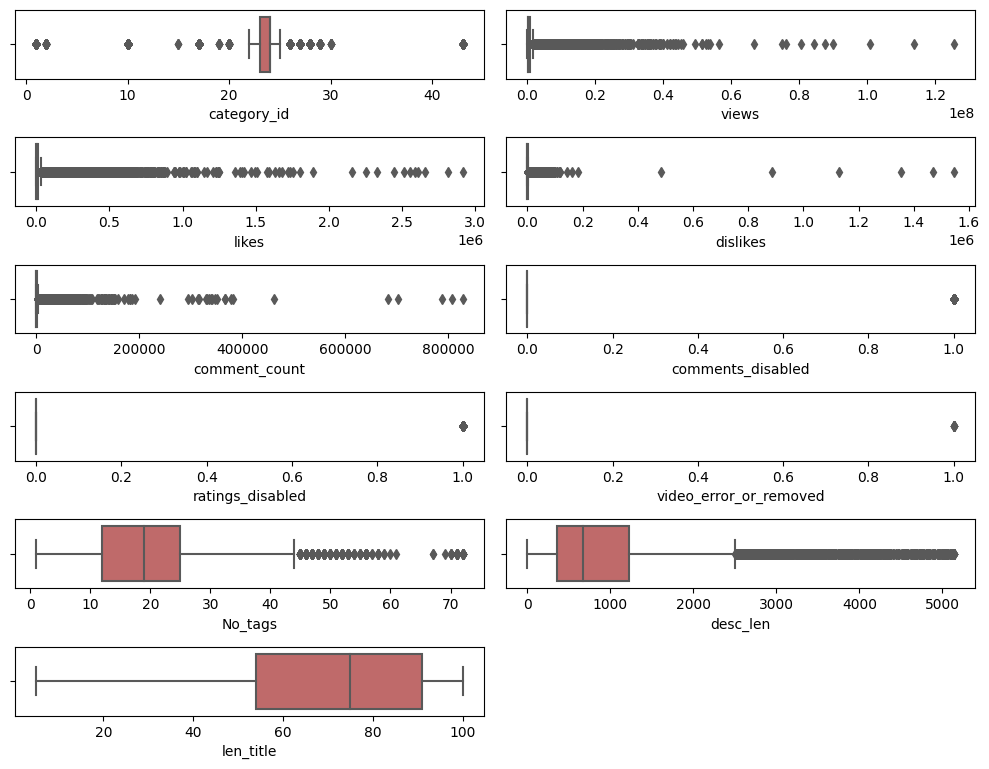

In [ ]:
#Boxplot fitur numerical
plt.figure(figsize=(10,15))
for i in range (0, len(numeric)):
    plt.subplot(12, 2, i+1)
    sns.boxplot (x=df_clean[numeric [i]], color= 'indianred')
    plt.tight_layout()

plt.show()

### **Observasi Boxplots :**<br>

**Fitur 'views', 'likes', 'dislikes', 'comment_count' :**<br>
- Pada fitur 'views' rentang jumlah views pada video berkisar dari 0 hingga 1,3 juta, mencerminkan variasi yang signifikan dalam popularitas video di platform YouTube. Namun, angka tersebut hanya merangkum kisaran nilai yang ditemukan dalam sampel data yang digunakan. Nilai tengah atau median dari fitur views, terlihat bahwa nilai median mencapai sekitar 3,7 juta (setengah dari nilai views berada di atas 3,7 juta dan setengahnya lagi berada di bawahnya).

- Pada fitur 'likes' rentang jumlah likes pada video berkisar antara 0 sampai 2,9 juta dengan nilai tengah 3,12 juta, mengindikasikan variasi yang sangat besar dalam jumlah respons positif dari penonton terhadap video tersebut.

- Pada fitur 'dislikes' rentang jumlah dislikes adalah berkisar dari angka 0 sampai 1,5 juta, kita dapat melihat bahwa distribusi angka-angka dislikes memiliki variasi yang signifikan dalam rentang tersebut. Selain itu, terdapat beberapa titik pada diagram kotak (outliers) yang terletak di atas nilai maksimum dalam kotak (upper whisker), yaitu pada angka 0,5; 0,9; 1,1; 1,39; 1,45; dan 1,65. Outliers-outliers ini menunjukkan bahwa ada beberapa video yang mendapatkan dislikes dalam jumlah yang sangat tinggi, jauh di atas angka rata-rata. Outliers semacam ini bisa menjadi poin penting dalam analisis, karena mereka mungkin mewakili video-video kontroversial atau konten yang kurang disukai secara signifikan oleh sebagian besar penonton.

-  Fitur 'comment_count' menggambarkan jumlah komentar yang diterima oleh video-video di platform YouTube. Dalam rentang data ini, jumlah komen berkisar mulai dari angka 0 hingga mencapai angka yang sangat tinggi, yaitu 827.755, sedangkan nilai tengah dalam distribusi data, berada pada angka 336. Rentang yang luas ini mencerminkan variasi yang signifikan dalam tingkat interaksi yang diterima oleh berbagai video.

- Berdasarkan grafik boxplot kepusatan data tidak terlihat, kita dapat melihat bahwa data terkumpul secara signifikan di bagian bawah plot, tetapi juga mengalami penyebaran yang sangat ekstensif ke atas. Ini menunjukkan adanya banyak outlier atau nilai-nilai yang sangat ekstrim yang jauh di luar kisaran umum. Kehadiran outlier ini dapat menghasilkan dampak besar pada perhitungan statistik seperti mean dan standar deviasi, serta mempengaruhi interpretasi keseluruhan data. Nilai-nilai outlier ini dapat memengaruhi rata-rata atau mean dari data secara signifikan, menjauhkannya dari median. Grafik boxplot yang tidak menunjukkan adanya "kotak" atau sebaran data yang kompak di sekitar median dapat menjadi indikator bahwa terdapat variasi ekstrem dalam jumlah views, like, dislike, dan comment pada video, dengan beberapa video mungkin memiliki popularitas yang jauh lebih tinggi daripada yang lain.

**Kolom no_tags :**<br>
Pada fitur jumlah tag, kita dapat mengamati bahwa data memiliki rentang nilai dari 3 hingga 72. Meskipun median, yang merupakan nilai tengah dari distribusi data, berada pada angka 12, sebagian besar data terkonsentrasi di kisaran 12 hingga 25 tag. Ini menandakan bahwa mayoritas video cenderung menggunakan jumlah tag yang relatif sedang hingga cukup banyak. Namun, penting untuk mencatat bahwa terdapat nilai-nilai outliers di atas nilai maksimum yang umum, yaitu 42. Outliers ini adalah nilai-nilai yang signifikan secara numerik dan berada jauh di atas sebagian besar data lainnya. Praktisnya, ini berarti ada sejumlah video yang menggunakan jumlah tag yang jauh lebih tinggi dari rata-rata.

**Kolom desc_len :**<br>
Fitur jumlah kata pada deskripsi video menunjukkan variasi dalam panjang deskripsi yang digunakan. Dengan rentang mulai dari 3 (tidak ada deskripsi) hingga 5136 kata, distribusi data ini menggambarkan variasi dalam kandungan deskripsi yang dimasukkan oleh pembuat video. Median pada angka 677 kata mengindikasikan bahwa setengah dari deskripsi memiliki panjang di bawah angka ini, sementara setengah lainnya lebih panjang. Meskipun median mengindikasikan nilai tengah distribusi, nilai-nilai ini terpusat secara lebih konsisten di kisaran 500 hingga 1200 kata. Ini dapat menunjukkan bahwa sebagian besar pembuat video cenderung memilih untuk memberikan deskripsi yang relatif seimbang dan terperinci, tetapi tidak terlalu panjang. Namun, patut dicatat bahwa ada beberapa nilai-nilai outliers yang berada di atas nilai maksimumnya, yaitu di sekitar angka 2600an kata. Nilai-nilai ini menunjukkan adanya sejumlah video dengan deskripsi yang sangat panjang, mungkin digunakan untuk memberikan konteks mendalam atau informasi tambahan kepada penonton.

**Kolom len_title :**<br>
Rentang panjang kata dari 5 hingga 100 kata memberikan keragaman dalam variasi, yang mungkin mencerminkan berbagai pendekatan dalam pemilihan kata-kata untuk judul video. Dalam distribusi ini, median jumlah kata adalah 74 kata. Namun, perhatian kita tertuju pada fakta bahwa distribusi ini memiliki kecenderungan kuat terpusat di sekitar kisaran 53 hingga 90 kata. Ini menunjukkan bahwa sebagian besar judul video memiliki panjang kata yang relatif serupa dalam rentang ini. Nilai maksimum pada 100 kata menunjukkan adanya batasan dalam panjang judul video, mungkin sebagai hasil dari aturan platform atau preferensi konten. Tidak adanya outlier dalam distribusi juga menunjukkan bahwa sebagian besar judul video cenderung memiliki panjang kata yang masuk akal dan tidak ekstrem.

Dengan pemahaman ini, kita dapat melihat bahwa pemilihan panjang kata pada judul video YouTube tampaknya mengikuti pola yang lebih terfokus dan terkontrol, dengan mayoritas judul video berada dalam kisaran tertentu yang lebih disukai oleh pembuat konten atau mungkin lebih menarik bagi penonton. Analisis ini dapat membantu kita lebih memahami bagaimana panjang kata dalam judul video dapat memengaruhi daya tarik dan keterlibatan penonton.

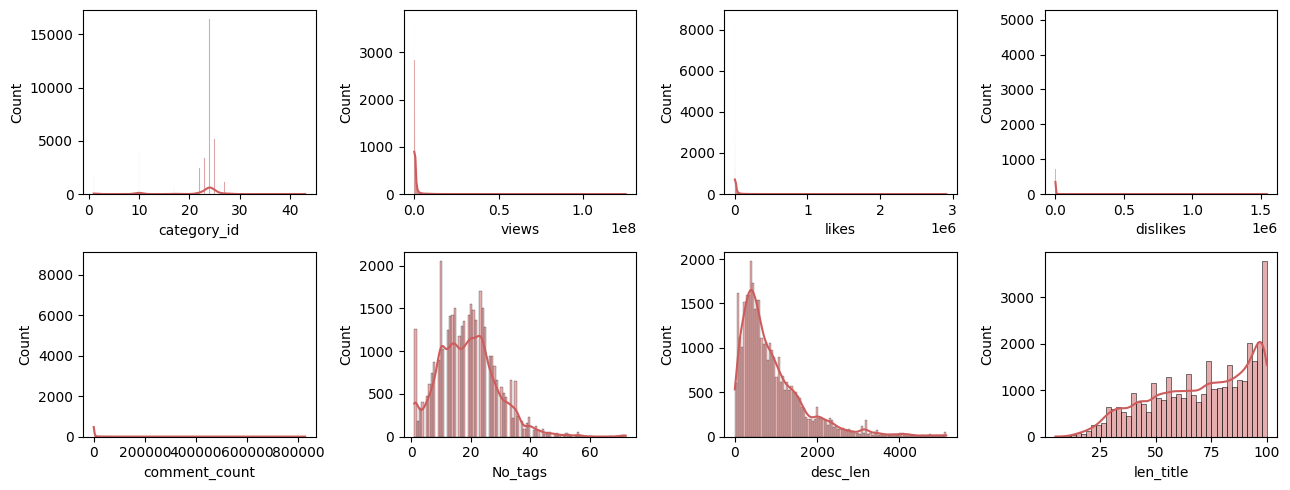

In [ ]:
# histogram plot untuk data numerical
plt.figure(figsize=(13,5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.histplot(x=df[nums[i]], kde=True, color='indianred')
    plt.xlabel(nums[i])
    plt.tight_layout()

### **Observasi :**<br>

*Fitur 'category_id', 'likes', 'dislikes', ' dan 'comment_count'*<br>
Grafik pada fitur 'category_id', 'views', 'likes', 'dislikes', ' dan 'comment_count'  tidak menunjukkan distribusi frekuensinya dengan jelas karena sebaran datanya terlalu besar. Hal tersebut umumnya merujuk pada situasi di mana data memiliki variasi atau rentang nilai yang sangat luas, sehingga membuat visualisasi distribusi menjadi kurang informatif atau sulit untuk diinterpretasi. Dalam konteks ini, sebaran yang luas dapat membuat beberapa nilai data berada pada rentang yang sangat tinggi atau rendah, yang dapat "memicu" bagian-bagian dari grafik sehingga tidak banyak detail dapat dilihat.

*Fitur 'No_tags'*<br>
Distribusi dari data ini menunjukkan kecenderungan untuk mengikuti distribusi normal, tetapi dengan sedikit pergeseran ke kanan (positively skewed). Hal ini mengindikasikan bahwa mayoritas nilai data berada di sekitar angka-angka yang tidak terlalu besar (dibawah 40), tetapi ada beberapa nilai yang lebih tinggi yang membuat ekor distribusi terlihat pada rentang angka 50 ke atas. Walaupun terdapat sedikit pergeseran pada distribusi, fitur ini tidak memerlukan pre-processing yang rumit atau mendalam. Pengolahan awal seperti normalisasi mungkin perlu diperlukan, supaya sebaran data bisa menjadi normal.

*Fitur 'desc_len'*<br>
Grafik distribusi menunjukkan adanya ekor yang panjang ke kanan, dimulai dari angka 2000 kata ke atas. Situasi ini menandakan bahwa sebagian besar video memiliki deskripsi dengan jumlah kata yang relatif rendah, tetapi ada beberapa video yang memiliki deskripsi yang sangat panjang. Fitur desc_len tampaknya memerlukan tahapan pre-processing lanjutan sebelum digunakan dalam model atau analisis lebih lanjut. Pre-processing ini mungkin termasuk mengatasi nilai-nilai ekstrem atau outlier yang terdapat pada ekor distribusi, serta penerapan teknik transformasi atau rekategorisasi untuk menghasilkan distribusi yang lebih seimbang dan sesuai dengan karakteristik data yang lebih umum.

*Fitur 'len_title'*<br>
Gafik dustribusi pada fitur len_title menunjukkan kecenderungan condong ke arah kiri. Terlihat bahwa sebagian besar judul video memiliki jumlah kata yang relatif pendek. Namun, menariknya, ekor distribusi mulai terbatas pada rentang 0 hingga sekitar 100 kata. Hal ini bisa menunjukkan adanya pembatasan panjang kata dalam judul video.

### Barplot Fitur Dengan Tipe Data Boolean

In [ ]:
import matplotlib.ticker as mtick

plt.figure(figsize=(10, 10))
bools = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
for i, col in enumerate(bools, 1):
    if i <= 8:  # Limit to 8 subplots
        plt.subplot(2, 4, i)
        percentages = (df_clean[col].value_counts() / len(df_clean) * 100)[:10]
        ax = sns.barplot(x=percentages.index, y=percentages.values, color='indianred')
        ax.set_title(col)
        ax.set_ylabel('Percentage')
        ax.set_ylim(0, 100)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter())
        plt.xticks

        for p, percentage in zip(ax.patches, percentages.values):
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.5, '{:.2f}%'.format(percentage), ha='center')
plt.tight_layout()
plt.show()

### **Observasi Barplot Boolean :**<br>

**Fitur 'comments_disabled':** <br>
Sekitar 96,79% dari video tidak memiliki komentar yang dinonaktifkan, sementara hanya sekitar 2,21% dari video yang memiliki komentar yang dinonaktifkan. Hal tersebut menunjukkan bahwa mayoritas video memungkinkan interaksi melalui komentar, sementara sebagian kecil video memiliki fitur komentar yang dinonaktifkan. Keterbatasan interaksi ini dapat memengaruhi cara penonton berinteraksi dengan video dan pembuat konten, serta mempengaruhi tingkat partisipasi dan engagement dari penonton.

**Fitur 'ratings_disabled':** <br>
Data menunjukkan bahwa sekitar 97,94% dari video tidak memiliki fitur rating yang dinonaktifkan, sedangkan hanya sekitar 2,06% dari video yang memiliki fitur rating yang dinonaktifkan. Hal tersebut mengindikasikan bahwa mayoritas video memungkinkan pengguna memberikan penilaian dalam bentuk like atau dislike, sementara sejumlah kecil video memiliki fitur rating yang dinonaktifkan.

**Fitur 'video_error_or_removed':** <br>
Mayoritas video, yaitu sekitar 97,94%, tidak mengalami masalah error atau penghapusan, sementara hanya sekitar 0,03% dari video yang mengalami masalah error atau telah dihapus. Hal tersebut ini menunjukkan bahwa sebagian besar video dalam dataset tetap aktif dan dapat diakses, sedangkan sejumlah sangat kecil video mengalami kendala seperti error teknis atau penghapusan dari platform.

## Multivariate Analysis

### Hubungan Antar Variabel Numeric

In [ ]:
df_clean[numeric].corr()

### Correlation Heatmap

In [ ]:
# Memeriksa korelasi antara variabel numerik dengan heatmap korelasi
plt.figure(figsize=(10,5))
sns.heatmap(df_clean[numeric].corr(), cmap='Reds', annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

### Observasi:
- Berdasarkan korelasi heatmap, kebanyakan korelasi dari fitur tersebut adalah lemah atau sangat lemah (korelasi negatif), yaitu fitur no_tags, desc_len, dan len_title.
- Sedangkan terdapat 4 kolom yang berkorelasi positif dan kuat (>= 0,5), yaitu views, likes, dislikes, dan comment_count.

#### Rekomendasi Tindak Lanjut:
- **Fitur positif :** Fitur-fitur yang memiliki korelasi positif dan kuat yaitu views, likes, dislikes, dan comment_count tetap dipertahankan untuk dimasukkan untuk pemodelan ML.
- **Fitur negatif :**<br>
  'category_id' = Meskipun memiliki korelasi sangat lemah terhadap semua fitur yang lain, namun harus mempertimbangkan untuk memasukkannya ke dalam model, karena kategori video dapat memengaruhi jumlah views.<br>
  'no_tags' = Fitur harus dipertimbangkan juga, karena jumlah tags yang digunakan dalam video mungkin masih memiliki pengaruh pada popularitasnya<br>
- Pada 'No_tags', 'desc_len', 'len_title' karena fitur tersebut adalah panjang kata, jadi dapat mengubah fitur-fitur ini menjadi kategori berdasarkan rentang nilai tertentu, misal 'pendek', 'sedang', 'panjang'.

### Scatter Plot Untuk Melihat Hubungan Antar Variabel Numeric

KeyboardInterrupt: ignored

<Figure size 1500x1500 with 0 Axes>

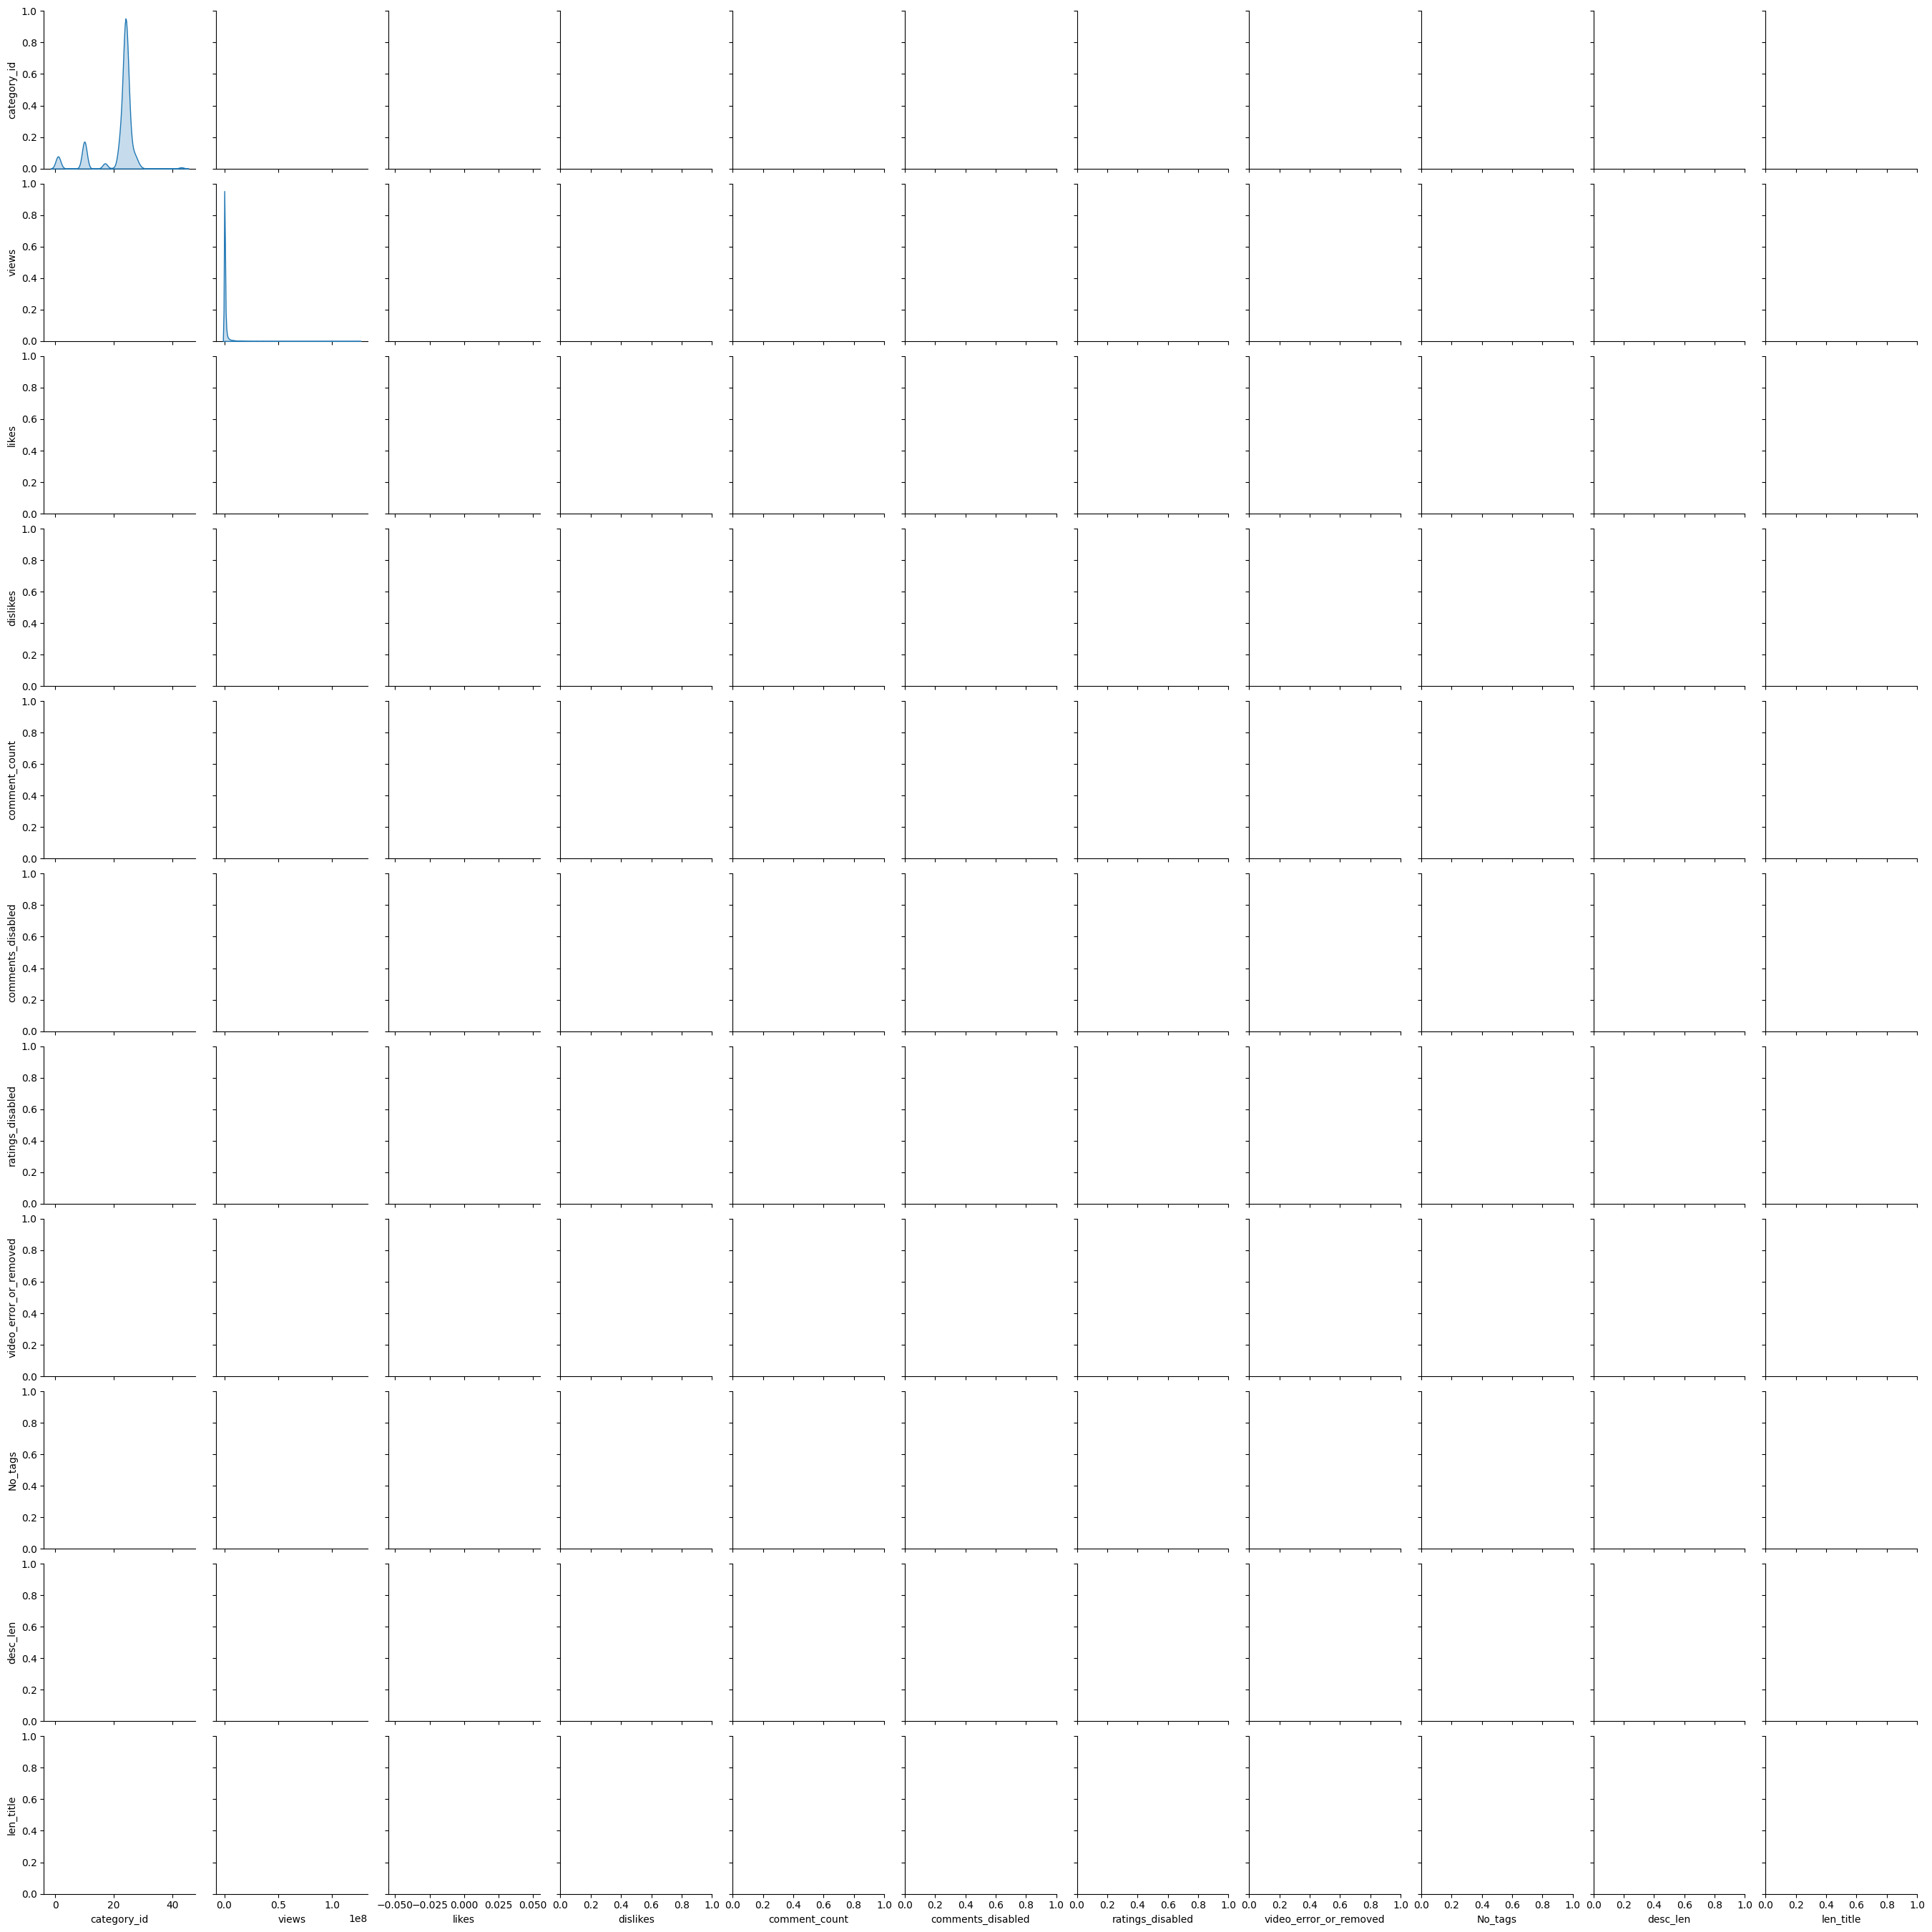

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df_clean, diag_kind='kde')
plt.show()

# DATA PRE-PROCESSING (LANJUTAN)

## **FEATURE ENGINEERING**

Feature yang dianggap perlu diekstrak adalah trending_date dan publish_date untuk mengextract 'day'. Sementara 'year' dan 'month' dianggap tidak perlu karena semua data memiliki tahun dan bulan yang sama (2017/11).

In [ ]:
df=df_clean

In [ ]:
#feature extraction trending_date
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
df['trending_date:day'] = df['trending_date'].dt.day
df[['trending_date', 'trending_date:day']].head(5)

,trending_date,trending_date:day
0,2017-11-14,14
1,2017-11-14,14
2,2017-11-14,14
3,2017-11-14,14
4,2017-11-14,14


In [ ]:
#feature extraction publish_date
df['publish_date'] = pd.to_datetime(df['publish_date'], errors='coerce')
df['publish_date:day'] = df['publish_date'].dt.day
df[['publish_date','publish_date:day']].head(5)

,publish_date,publish_date:day
0,2017-11-12,12
1,2017-11-13,13
2,2017-11-12,12
3,2017-11-12,12
4,2017-11-13,13


In [ ]:
#menambahkan feature day_difference untuk mengetahui selisih waktu trending dan publish
df['day_difference'] = df['trending_date:day'] - df['publish_date:day']
df.head()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,trending_date:day,publish_date:day,day_difference
0,2017-11-14,1,2023-08-23 12:20:39,1096327,33966,798,882,0,0,0,15,920,81,2017-11-12,14,12,2
1,2017-11-14,25,2023-08-23 05:43:56,590101,735,904,0,1,0,0,19,2232,58,2017-11-13,14,13,1
2,2017-11-14,24,2023-08-23 15:48:08,473988,2011,243,149,0,0,0,14,482,58,2017-11-12,14,12,2
3,2017-11-14,23,2023-08-23 07:08:48,1242680,70353,1624,2684,0,0,0,20,263,30,2017-11-12,14,12,2
4,2017-11-14,24,2023-08-23 01:14:16,464015,492,293,66,0,0,0,11,753,88,2017-11-13,14,13,1


In [ ]:
#Ekstraksi publish time and day part untuk mengetahui kisaran waktu publish video yang akan trending
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
def day_part(hour):
    if hour in [4,5]:
        return "dawn"
    elif hour in [6,7]:
        return "early_morning"
    elif hour in [8,9,10]:
        return "late_morning"
    elif hour in [11,12,13]:
        return "noon"
    elif hour in [14,15,16]:
        return "afternoon"
    elif hour in [17, 18,19]:
        return "evening"
    elif hour in [20, 21, 22]:
        return "night"
    elif hour in [23,24,1,2,3]:
        return "midnight"



In [ ]:
df['publish_time:hour'] = df['publish_time'].dt.hour
df['publish_time:day_part'] = df['publish_time:hour'].apply(day_part)
df.head()

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,trending_date:day,publish_date:day,day_difference,publish_time:hour,publish_time:day_part
0,2017-11-14,1,2023-08-23 12:20:39,1096327,33966,798,882,0,0,0,15,920,81,2017-11-12,14,12,2,12,noon
1,2017-11-14,25,2023-08-23 05:43:56,590101,735,904,0,1,0,0,19,2232,58,2017-11-13,14,13,1,5,dawn
2,2017-11-14,24,2023-08-23 15:48:08,473988,2011,243,149,0,0,0,14,482,58,2017-11-12,14,12,2,15,afternoon
3,2017-11-14,23,2023-08-23 07:08:48,1242680,70353,1624,2684,0,0,0,20,263,30,2017-11-12,14,12,2,7,early_morning
4,2017-11-14,24,2023-08-23 01:14:16,464015,492,293,66,0,0,0,11,753,88,2017-11-13,14,13,1,1,midnight


In [ ]:
# extract feature published_on_weekend atau weekday


def isWeekend(day):
    if day.day_name() in ['Saturday', 'Sunday']:
        return "weekend"
    else:
        return "weekday"

df['publish_isweekend'] = df['publish_date'].apply(isWeekend)
df.head(5)

,trending_date,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,publish_date,trending_date:day,publish_date:day,day_difference,publish_time:hour,publish_time:day_part,publish_isweekend
0,2017-11-14,1,2023-08-23 12:20:39,1096327,33966,798,882,0,0,0,15,920,81,2017-11-12,14,12,2,12,noon,weekend
1,2017-11-14,25,2023-08-23 05:43:56,590101,735,904,0,1,0,0,19,2232,58,2017-11-13,14,13,1,5,dawn,weekday
2,2017-11-14,24,2023-08-23 15:48:08,473988,2011,243,149,0,0,0,14,482,58,2017-11-12,14,12,2,15,afternoon,weekend
3,2017-11-14,23,2023-08-23 07:08:48,1242680,70353,1624,2684,0,0,0,20,263,30,2017-11-12,14,12,2,7,early_morning,weekend
4,2017-11-14,24,2023-08-23 01:14:16,464015,492,293,66,0,0,0,11,753,88,2017-11-13,14,13,1,1,midnight,weekday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   category_id             32518 non-null  int64         
 2   publish_time            32518 non-null  datetime64[ns]
 3   views                   32518 non-null  int64         
 4   likes                   32518 non-null  int64         
 5   dislikes                32518 non-null  int64         
 6   comment_count           32518 non-null  int64         
 7   comments_disabled       32518 non-null  int64         
 8   ratings_disabled        32518 non-null  int64         
 9   video_error_or_removed  32518 non-null  int64         
 10  No_tags                 32518 non-null  int64         
 11  desc_len                32518 non-null  int64         
 12  len_title               32518 non-null  int64 

In [ ]:
df['publish_time:day_part'].value_counts()

noon             6750
afternoon        6177
late_morning     5280
early_morning    3821
dawn             3561
midnight         2997
evening          2506
night            1077
Name: publish_time:day_part, dtype: int64

In [ ]:
df.duplicated().sum()

0

## Drop Features yang tidak dipakai modelling

In [ ]:
df_ = df.drop(['publish_date','trending_date:day','publish_time:hour', 'publish_time','publish_date:day','trending_date'], axis=1)
df_.head(10)

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,len_title,day_difference,publish_time:day_part,publish_isweekend
0,1,1096327,33966,798,882,0,0,0,15,920,81,2,noon,weekend
1,25,590101,735,904,0,1,0,0,19,2232,58,1,dawn,weekday
2,24,473988,2011,243,149,0,0,0,14,482,58,2,afternoon,weekend
3,23,1242680,70353,1624,2684,0,0,0,20,263,30,2,early_morning,weekend
4,24,464015,492,293,66,0,0,0,11,753,88,1,midnight,weekday
5,24,6106669,98612,4185,4763,0,0,0,22,449,91,4,dawn,weekday
6,10,5718766,127477,7134,8063,0,0,0,18,1411,96,3,afternoon,weekend
7,10,10588371,132738,8812,10847,0,0,0,26,1299,96,3,early_morning,weekend
8,24,118223,520,53,23,0,0,0,21,509,97,1,dawn,weekday
9,24,969030,59798,1545,2404,0,0,0,23,477,34,2,dawn,weekend


## ONE HOT ENCODING


In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   category_id             32518 non-null  int64 
 1   views                   32518 non-null  int64 
 2   likes                   32518 non-null  int64 
 3   dislikes                32518 non-null  int64 
 4   comment_count           32518 non-null  int64 
 5   comments_disabled       32518 non-null  int64 
 6   ratings_disabled        32518 non-null  int64 
 7   video_error_or_removed  32518 non-null  int64 
 8   No_tags                 32518 non-null  int64 
 9   desc_len                32518 non-null  int64 
 10  len_title               32518 non-null  int64 
 11  day_difference          32518 non-null  int64 
 12  publish_time:day_part   32169 non-null  object
 13  publish_isweekend       32518 non-null  object
dtypes: int64(12), object(2)
memory usage: 3.7+ MB


In [ ]:

encodee = ['publish_time:day_part', 'publish_isweekend']

for e in encodee:
    ohe= pd.get_dummies(df_[e], prefix=e)
    df_ = df_.join(ohe)

df_ = df_.drop(encodee, axis=1)


## Buang Outliers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   category_id             32518 non-null  int64         
 2   publish_time            32518 non-null  datetime64[ns]
 3   views                   32518 non-null  int64         
 4   likes                   32518 non-null  int64         
 5   dislikes                32518 non-null  int64         
 6   comment_count           32518 non-null  int64         
 7   comments_disabled       32518 non-null  int64         
 8   ratings_disabled        32518 non-null  int64         
 9   video_error_or_removed  32518 non-null  int64         
 10  No_tags                 32518 non-null  int64         
 11  desc_len                32518 non-null  int64         
 12  len_title               32518 non-null  int64 

In [ ]:
print('Number of rows before removing outlier', len(df_))

filtered = np.array([True] * len(df_))
for f in ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'day_difference']:
    Q1 = df_[f].quantile(0.25)
    Q3 = df_[f].quantile(0.75)
    iqr = Q3 - Q1
    b_thresh = Q1 - (1.5 * iqr)
    u_thresh = Q3 + (1.5 * iqr)

    filtered = ((df_[f] >= b_thresh) & (df_[f] <= u_thresh))
df_ = df_[filtered]

print('Number of rows after removing outlier:', len(df_))

Number of rows before removing outlier 32518
Number of rows after removing outlier: 30361


## Normalization

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30361 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   category_id                          30361 non-null  int64
 1   views                                30361 non-null  int64
 2   likes                                30361 non-null  int64
 3   dislikes                             30361 non-null  int64
 4   comment_count                        30361 non-null  int64
 5   comments_disabled                    30361 non-null  int64
 6   ratings_disabled                     30361 non-null  int64
 7   video_error_or_removed               30361 non-null  int64
 8   No_tags                              30361 non-null  int64
 9   desc_len                             30361 non-null  int64
 10  len_title                            30361 non-null  int64
 11  day_difference                       30361 non-null  i

In [ ]:
# before
df_.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,...,publish_time:day_part_afternoon,publish_time:day_part_dawn,publish_time:day_part_early_morning,publish_time:day_part_evening,publish_time:day_part_late_morning,publish_time:day_part_midnight,publish_time:day_part_night,publish_time:day_part_noon,publish_isweekend_weekday,publish_isweekend_weekend
count,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,...,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000
mean,21.63051,923856.35259,23858.80238,1505.14235,2385.96545,0.03294,0.02121,0.00030,18.85162,910.21083,...,0.19038,0.10971,0.11814,0.07632,0.16195,0.09446,0.03313,0.20503,0.73864,0.26136
std,6.49805,2777967.60598,87249.18268,17487.92662,14260.90691,0.17847,0.14409,0.01721,9.84081,804.74624,...,0.39260,0.31254,0.32279,0.26551,0.36841,0.29248,0.17899,0.40373,0.43938,0.43938
min,1.00000,4287.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,4.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,23.00000,110862.00000,786.00000,97.00000,72.00000,0.00000,0.00000,0.00000,12.00000,366.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,24.00000,269067.00000,2741.00000,284.00000,299.00000,0.00000,0.00000,0.00000,19.00000,672.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
75%,24.00000,704922.00000,11690.00000,901.00000,1147.00000,0.00000,0.00000,0.00000,25.00000,1221.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,43.00000,125432237.00000,2912710.00000,1545017.00000,827755.00000,1.00000,1.00000,1.00000,72.00000,5136.00000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [ ]:



# log transformation & standardization

from sklearn.preprocessing import StandardScaler

features = df_.select_dtypes(["float64", "int64", "int32",'uint8']).columns
features
for var in features:
    df_[var]= (df_[var]+1).apply(np.log)
for var in features:
    df_[var]= StandardScaler().fit_transform(df_[var].values.reshape(len(df_), 1))



In [ ]:
# after
df_.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,No_tags,desc_len,...,publish_time:day_part_afternoon,publish_time:day_part_dawn,publish_time:day_part_early_morning,publish_time:day_part_evening,publish_time:day_part_late_morning,publish_time:day_part_midnight,publish_time:day_part_night,publish_time:day_part_noon,publish_isweekend_weekday,publish_isweekend_weekend
count,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,...,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000,30361.00000
mean,-4.82083,0.04935,0.01449,-0.00022,-0.03955,0.02283,0.01470,0.00021,-0.24389,-0.07022,...,0.13196,0.07605,0.08185,0.05292,0.11230,0.06549,0.02296,0.14209,-0.26123,0.26123
std,13.93057,0.75018,0.83689,0.80347,0.79857,0.12371,0.09988,0.01193,0.93148,0.79813,...,0.27222,0.21667,0.22375,0.18408,0.25537,0.20276,0.12408,0.28003,0.43921,0.43921
min,-61.87176,-2.23762,-2.93381,-2.54657,-2.07010,0.00000,0.00000,0.00000,-3.32193,-4.07547,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.00000
25%,-1.00000,-0.47933,-0.46259,-0.48094,-0.51294,0.00000,0.00000,0.00000,-0.62149,-0.50411,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.00000
50%,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,0.00000,0.52067,0.53741,0.51906,0.48706,0.00000,0.00000,0.00000,0.37851,0.49589,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000
max,13.84827,3.32175,2.58238,3.87361,2.87542,0.69315,0.69315,0.69315,1.86790,1.68967,...,0.69336,0.69336,0.69336,0.69336,0.69336,0.69336,0.69336,0.69336,0.00000,1.00000


# MODELLING

## Split Data

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30361 entries, 0 to 36769
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   category_id                          30361 non-null  float64
 1   views                                30361 non-null  float64
 2   likes                                30361 non-null  float64
 3   dislikes                             30361 non-null  float64
 4   comment_count                        30361 non-null  float64
 5   comments_disabled                    30361 non-null  float64
 6   ratings_disabled                     30361 non-null  float64
 7   video_error_or_removed               30361 non-null  float64
 8   No_tags                              30361 non-null  float64
 9   desc_len                             30361 non-null  float64
 10  len_title                            30361 non-null  float64
 11  day_difference              

In [ ]:
features = df_.select_dtypes(["float64", "float16"]).columns
x = df_[features].drop(['views'], axis=1)
x.info()

y = df_['views']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30361 entries, 0 to 36769
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   category_id                          30361 non-null  float64
 1   likes                                30361 non-null  float64
 2   dislikes                             30361 non-null  float64
 3   comment_count                        30361 non-null  float64
 4   comments_disabled                    30361 non-null  float64
 5   ratings_disabled                     30361 non-null  float64
 6   video_error_or_removed               30361 non-null  float64
 7   No_tags                              30361 non-null  float64
 8   desc_len                             30361 non-null  float64
 9   len_title                            30361 non-null  float64
 10  day_difference                       30361 non-null  float64
 11  publish_time:day_part_aftern

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21252 entries, 32278 to 26890
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   category_id                          21252 non-null  float64
 1   likes                                21252 non-null  float64
 2   dislikes                             21252 non-null  float64
 3   comment_count                        21252 non-null  float64
 4   comments_disabled                    21252 non-null  float64
 5   ratings_disabled                     21252 non-null  float64
 6   video_error_or_removed               21252 non-null  float64
 7   No_tags                              21252 non-null  float64
 8   desc_len                             21252 non-null  float64
 9   len_title                            21252 non-null  float64
 10  day_difference                       21252 non-null  float64
 11  publish_time:day_part_af

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9109 entries, 24900 to 21852
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   category_id                          9109 non-null   float64
 1   likes                                9109 non-null   float64
 2   dislikes                             9109 non-null   float64
 3   comment_count                        9109 non-null   float64
 4   comments_disabled                    9109 non-null   float64
 5   ratings_disabled                     9109 non-null   float64
 6   video_error_or_removed               9109 non-null   float64
 7   No_tags                              9109 non-null   float64
 8   desc_len                             9109 non-null   float64
 9   len_title                            9109 non-null   float64
 10  day_difference                       9109 non-null   float64
 11  publish_time:day_part_aft

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 21252 entries, 32278 to 26890
Series name: views
Non-Null Count  Dtype  
--------------  -----  
21252 non-null  float64
dtypes: float64(1)
memory usage: 332.1 KB


In [ ]:
y_test.info()

<class 'pandas.core.series.Series'>
Int64Index: 9109 entries, 24900 to 21852
Series name: views
Non-Null Count  Dtype  
--------------  -----  
9109 non-null   float64
dtypes: float64(1)
memory usage: 142.3 KB


## Train Model  

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21252 entries, 32278 to 26890
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   category_id                          21252 non-null  float64
 1   likes                                21252 non-null  float64
 2   dislikes                             21252 non-null  float64
 3   comment_count                        21252 non-null  float64
 4   comments_disabled                    21252 non-null  float64
 5   ratings_disabled                     21252 non-null  float64
 6   video_error_or_removed               21252 non-null  float64
 7   No_tags                              21252 non-null  float64
 8   desc_len                             21252 non-null  float64
 9   len_title                            21252 non-null  float64
 10  day_difference                       21252 non-null  float64
 11  publish_time:day_part_af

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import cross_validate

def eval_regression(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)

  print('RMSE (test): ' + str(mean_squared_error(y_test, y_pred, squared=False)))
  print('RMSE (train): ' + str(mean_squared_error(y_train, y_pred_train, squared=False)))

  print('MAPE (test): ' + str(mean_absolute_percentage_error(y_test, y_pred)))
  print('MAPE (train): ' + str(mean_absolute_percentage_error(y_train, y_pred_train)))

  print('r2 (test): ' + str(r2_score(y_test, y_pred)))
  print('r2 (train): ' + str(r2_score(y_train, y_pred_train)))

  # k-fold cross validation
  score = cross_validate(model, x, y, cv=5, scoring='r2', return_train_score=True)
  print('r2 (cross-val test): ' + str(score['test_score'].mean()))
  print('r2 (cross-val train): ' + str(score['train_score'].mean()))




In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

models = {
    'linear': LinearRegression(),
    'ridge': Ridge(),
    'lasso': Lasso(),
    'xgb': XGBRegressor(),
    'rf': RandomForestRegressor(random_state=42)
}


for model_name, model in models.items():
    model.fit(x_train, y_train)
    print(f'Evaluate Model: {model_name} \n')
    print(eval_regression(model))

Evaluate Model: linear 

RMSE (test): 0.32632676079697703
RMSE (train): 0.32623108116367266
MAPE (test): 230975311849.1079
MAPE (train): 16.77408855423268
r2 (test): 0.8125840277455494
r2 (train): 0.8100554388185011
r2 (cross-val test): 0.8017625185733589
r2 (cross-val train): 0.8108959494847173
None
Evaluate Model: ridge 

RMSE (test): 0.3263345086197232
RMSE (train): 0.32625254425893824
MAPE (test): 238650463396.55963
MAPE (train): 16.774891428236383
r2 (test): 0.8125751281814001
r2 (train): 0.8100304446805682
r2 (cross-val test): 0.8019128083395559
r2 (cross-val train): 0.810873548110154
None
Evaluate Model: lasso 

RMSE (test): 0.7365636635192195
RMSE (train): 0.7311772988997369
MAPE (test): 9606206824.368885
MAPE (train): 1.956285070429926
r2 (test): 0.045179355182296654
r2 (train): 0.04583915625646462
r2 (cross-val test): 0.0029287479512828396
r2 (cross-val train): 0.04589785818766536
None
Evaluate Model: xgb 

RMSE (test): 0.22913831510531346
RMSE (train): 0.1727333298053707
MAP

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
''' def eval_regression(y_test, pred):
    print("MAE: %.2f" % mean_absolute_error(y_test, pred)) # The MAE
    print("RMSE: %.2f" % mean_squared_error(y_test, pred, squared=False)) # The RMSE
    print('R2 score: %.2f' % r2_score(y_test, pred)) # Explained variance score: 1 is perfect prediction '''

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

## Modelling pakai ANN

In [ ]:
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
!pip install tensorflow==2.13.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 34.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
import tensorflow as tf
from tensorflow_addons.metrics import RSquare
from scikeras.wrappers import KerasRegressor

print(tf.__version__)

2.13.0


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
bro_ann = tf.keras.Sequential()
bro_ann.add(tf.keras.layers.Dense(336, input_dim=(x_train.shape[1]), activation='relu'))
bro_ann.add(tf.keras.layers.Dense(672, activation='relu'))
bro_ann.add(tf.keras.layers.Dense(168, activation='relu'))
bro_ann.add(tf.keras.layers.Dense(84, activation='relu'))
bro_ann.add(tf.keras.layers.Dense(42, activation='relu'))
bro_ann.add(tf.keras.layers.Dense(21, activation='relu'))
bro_ann.add(tf.keras.layers.Dense(1, activation='linear'))
bro_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 336)               7392      
                                                                 
 dense_1 (Dense)             (None, 672)               226464    
                                                                 
 dense_2 (Dense)             (None, 168)               113064    
                                                                 
 dense_3 (Dense)             (None, 84)                14196     
                                                                 
 dense_4 (Dense)             (None, 42)                3570      
                                                                 
 dense_5 (Dense)             (None, 21)                903       
                                                                 
 dense_6 (Dense)             (None, 1)                 2

In [ ]:
bro_ann.compile( loss = tf.keras.losses.mean_squared_error,
              optimizer=tf.keras.optimizers.Lion(learning_rate=0.00001),

              metrics = ['mae', 'mape', RSquare()]
              )
bro_ann_wrapped =  KerasRegressor(bro_ann)

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_r_square',
                                   mode='max',
                                   patience=20,
                                   restore_best_weights=True)

In [ ]:
bro_ann_model = bro_ann_wrapped.fit(x_train, y_train,callbacks=es,batch_size=20,
                    shuffle=True, validation_split=0.1, epochs=50)

Epoch 1/50
957/957 [==============================] - 12s 10ms/step - loss: 0.3673 - mae: 0.4557 - mape: 252.4314 - r_square: 0.6331 - val_loss: 0.1832 - val_mae: 0.3411 - val_mape: 417.8757 - val_r_square: 0.8065
Epoch 2/50
957/957 [==============================] - 11s 11ms/step - loss: 0.1806 - mae: 0.3224 - mape: 275.5216 - r_square: 0.8196 - val_loss: 0.1568 - val_mae: 0.3095 - val_mape: 365.0373 - val_r_square: 0.8344
Epoch 3/50
957/957 [==============================] - 10s 10ms/step - loss: 0.1529 - mae: 0.3025 - mape: 276.0313 - r_square: 0.8472 - val_loss: 0.1447 - val_mae: 0.2923 - val_mape: 367.9166 - val_r_square: 0.8472
Epoch 4/50
957/957 [==============================] - 10s 11ms/step - loss: 0.1441 - mae: 0.2907 - mape: 294.6632 - r_square: 0.8560 - val_loss: 0.1408 - val_mae: 0.2871 - val_mape: 340.8209 - val_r_square: 0.8513
Epoch 5/50
957/957 [==============================] - 10s 10ms/step - loss: 0.1346 - mae: 0.2825 - mape: 276.7234 - r_square: 0.8655 - val_loss:

In [ ]:
print(f'Evaluate Model: ANN2 \n')
print(eval_regression(bro_ann_model))

Evaluate Model: ANN2 

665/665 [==============================] - 2s 3ms/step
RMSE (test): 0.3290507689027565
RMSE (train): 0.20498928185587542
MAPE (test): 2.0044684471933003
MAPE (train): 1.3842646192911812
r2 (test): 0.8927642144883985
r2 (train): 0.9577962349107899
760/760 [==============================] - 3s 3ms/step
r2 (cross-val test): 0.9264056772702325
r2 (cross-val train): 0.9448891482629189
None


##  Hyperparameter Tuning

### Tuning XGBRegressor

In [ ]:
param_grid_xgr  = {
    'n_estimators' : [100, 1000],
    'learning_rate' :[0.1, 0.05],
    'max_depth': [6, 20],
    'min_child_weight' : [1,10]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rt_xr = XGBRegressor()
rt_xr_model = RandomizedSearchCV(rt_xr, param_distributions=param_grid_xgr,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error')
rt_xr_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'learning_rate': [0.1, 0.05],
                                        'max_depth': [6, 20],
                                        'min_child_weight': [1, 10],
                                        'n_estimators': [100, 1000]},
                   scoring='neg_mean_squared_error')

In [ ]:
y_pred_xr_tuned = rt_xr_model.predict(x_test)

In [ ]:
show_best_hyperparameter(rt_xr_model.best_estimator_, param_grid_xgr)


Best n_estimators: 1000
Best learning_rate: 0.1
Best max_depth: 6
Best min_child_weight: 1


In [ ]:
xregr_rt = XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=6, min_child_weight=1)

xregr_rt.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
eval_regression(xregr_rt)

RMSE (test): 0.2731084716906397
RMSE (train): 0.13381137695712675
MAPE (test): 1.3160167873175888
MAPE (train): 1.0102949279354903
r2 (test): 0.9261272508671077
r2 (train): 0.9820164689716562
r2 (cross-val test): 0.8732655106561074
r2 (cross-val train): 0.9819369424406489


### TUNING RF

In [ ]:
param_grid_rf  = {
    'n_estimators' : [100, 1000],
    'random_state' :[42, 69],
    'max_features': ['sqrt', 'log2', 0.1],
    'max_depth' : [3,15],
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rt_rf = RandomForestRegressor()
rt_rf_model = RandomizedSearchCV(rt_rf, param_distributions=param_grid_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error')
rt_rf_model.fit(x_train,  y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [3, 15],
                                        'max_features': ['sqrt', 'log2', 0.1],
                                        'n_estimators': [100, 1000],
                                        'random_state': [42, 69]},
                   scoring='neg_mean_squared_error')

In [ ]:
y_pred_rf_tuned = rt_rf_model.predict(x_test)

In [ ]:
show_best_hyperparameter(rt_rf_model.best_estimator_, param_grid_rf)

Best n_estimators: 1000
Best random_state: 69
Best max_features: log2
Best max_depth: 15


In [ ]:
rfr_rt = RandomForestRegressor( n_estimators=1000, random_state=69, max_features='log2', max_depth=15)
rfr_rt.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='log2', n_estimators=1000,
                      random_state=69)

In [ ]:
eval_regression(rfr_rt)

RMSE (test): 0.3362240907098525
RMSE (train): 0.23237494438611583
MAPE (test): 1.796042903926452
MAPE (train): 1.671720322117576
r2 (test): 0.8880377614854401
r2 (train): 0.9457665182421907
r2 (cross-val test): 0.8583153646874264
r2 (cross-val train): 0.9459570483809715
